## **4. Construcción de Modelos**


---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from joblib import load

import warnings; warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import catboost as cat
import lightgbm as lgb

In [ ]:
df = pd.read_csv('traffic_site_1.csv')

---

## LightGBM

In [ ]:
data = df.copy()

In [ ]:
# Cargamos el clasificador lgbclass
lgbclass = load('clasificador_lgb.joblib')

In [ ]:
# Carcamos el regresor lgbreg
lgbreg = load('regresor_lgb.joblib')

In [ ]:
# Agregamos la columna 'class' y dividimos en entrenamiento y prueba
data['class'] = lgbclass.predict(data.drop(columns=['transactionRevenue']))
X = data.drop(columns=['transactionRevenue'])
y = data['transactionRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Predecimos con el regresor
y_pred_reg_lgb = lgbreg.predict(X_test)

# Convertimos todas las predicciones menores a 0.01 en 0
y_pred_reg_lgb = np.where(y_pred_reg_lgb < 0.01, 0, y_pred_reg_lgb)

# Scores
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg_lgb))
lgb_r2 = r2_score(y_test, y_pred_reg_lgb)

# Score del regresor para rmse
print(f'Raiz del error para el regresor: {lgb_rmse:.3f}')
print(f'R2 para el regresor: {lgb_r2:.3f}')


Raiz del error para el regresor: 15.879
R2 para el regresor: 0.304


---

## XGBoost

In [ ]:
data = df.copy()

In [ ]:
# Cargamos el clasificador xgbclass
xgbclass = load('clasificador_xgb.joblib')

In [ ]:
# Carcamos el regresor xgbreg
xgbreg = load('regresor_xgb.joblib')

In [ ]:
# Agregamos la columna 'class' y dividimos en entrenamiento y prueba
data['class'] = xgbclass.predict(data.drop(columns=['transactionRevenue']))
X = data.drop(columns=['transactionRevenue'])
y = data['transactionRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Predecimos con el regresor
y_pred_reg_xgb = xgbreg.predict(X_test)

# Convertimos todas las predicciones menores a 0.01 en 0
y_pred_reg_xgb = np.where(y_pred_reg_xgb < 0.01, 0, y_pred_reg_xgb)

# Scores
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg_xgb))
xgb_r2 = r2_score(y_test, y_pred_reg_xgb)

# Score del regresor para rmse
print(f'Raiz del error para el regresor: {xgb_rmse:.3f}')
print(f'R2 para el regresor: {xgb_r2:.3f}')


Raiz del error para el regresor: 18.248
R2 para el regresor: 0.081


---

## CatBoost

In [ ]:
data = df.copy()

In [ ]:
catclass = load('clasificador_cat.joblib')

In [ ]:
catreg = load('regresor_cat.joblib')

In [ ]:
# Agregamos la columna 'class' y dividimos en entrenamiento y prueba
data['class'] = catclass.predict(data.drop(columns=['transactionRevenue']))
X = data.drop(columns=['transactionRevenue'])
y = data['transactionRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Predecimos con el regresor
y_pred_reg_cat = catreg.predict(X_test)

# Convertimos todas las predicciones menores a 0.01 en 0
y_pred_reg_cat = np.where(y_pred_reg_cat < 0.01, 0, y_pred_reg_cat)

# Scores
cat_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg_cat))
cat_r2 = r2_score(y_test, y_pred_reg_cat)

# Score del regresor para rmse
print(f'Raiz del error para el regresor: {cat_rmse:.3f}')
print(f'R2 para el regresor: {cat_r2:.3f}')

Raiz del error para el regresor: 17.457
R2 para el regresor: 0.159


---

## Votacion

In [ ]:
data = df.copy()

In [ ]:
votingclass = load('clasificador.joblib')

In [ ]:
votingreg = load('regresor.joblib')

In [ ]:
# Agrergamos las columnas de clasificación
data['xgb_class'] = xgbclass.predict(data.drop(columns=['transactionRevenue']))
data['lgb_class'] = lgbclass.predict(data.drop(columns=['transactionRevenue', 'xgb_class']))
data['cat_class'] = catclass.predict(data.drop(columns=['transactionRevenue', 'xgb_class', 'lgb_class']))

X = data.drop(columns=['transactionRevenue'])
y = data['transactionRevenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Predecimos con el regresor
y_pred_reg = votingreg.predict(X_test)

# Convertimos todas las predicciones menores a 0.01 en 0
y_pred_reg = np.where(y_pred_reg < 0.01, 0, y_pred_reg)

# Scores
voting_rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
voting_r2 = r2_score(y_test, y_pred_reg)

# Score del regresor para rmse
print(f'Raiz del error para el regresor: {voting_rmse:.3f}')
print(f'R2 para el regresor: {voting_r2:.3f}')

Raiz del error para el regresor: 16.656
R2 para el regresor: 0.234


---

## **5. Evaluación de Modelos**

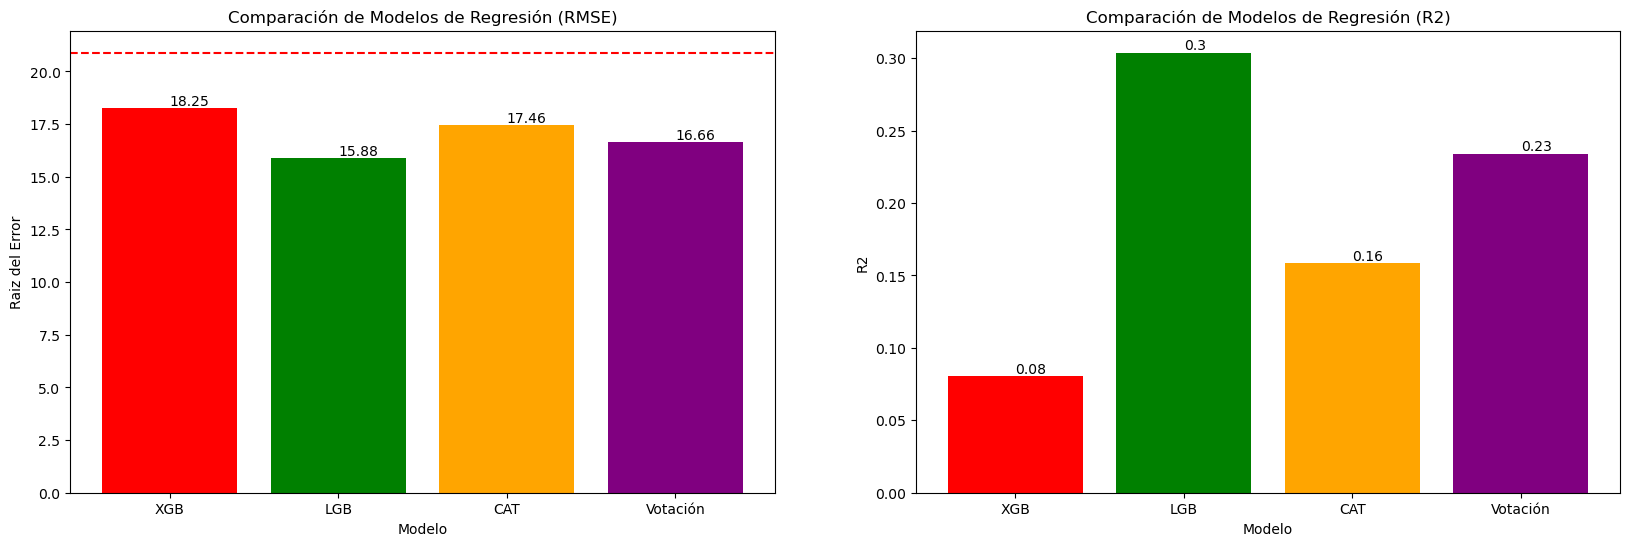

In [ ]:
# Crear un array con la media repetida para cada observación
mean_array = np.full(shape=df['transactionRevenue'].shape, fill_value=df['transactionRevenue'].mean())
mse = mean_squared_error(df['transactionRevenue'], mean_array)

# Comparar modelos de Regresion con el rmse y r2 gráficamente mediante barras
rmse = [xgb_rmse, lgb_rmse, cat_rmse, voting_rmse]
r2 = [xgb_r2, lgb_r2, cat_r2, voting_r2]
modelos = ['XGB', 'LGB', 'CAT', 'Votación']

fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Gráfico de RMSE
bars = axs[0].bar(modelos, rmse, color=['red', 'green', 'orange', 'purple'])
axs[0].set_title('Comparación de Modelos de Regresión (RMSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_ylabel('Raiz del Error')
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment
axs[0].axhline(y=np.round(np.sqrt(mse), 2), color='r', linestyle='--')

# Gráfico de R2
bars = axs[1].bar(modelos, r2, color=['red', 'green', 'orange', 'purple'])
axs[1].set_title('Comparación de Modelos de Regresión (R2)')
axs[1].set_xlabel('Modelo')
axs[1].set_ylabel('R2')
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()